# Aprendizaje Maquinal [ Proyecto Final ]

#### Integrantes: 
#####     --> Arzola Perez Armando
#####     --> Clavel Ojeda Karla Paola
#####     --> Santiago Valdes Yessica Fabiola



---

###     Analisis exploratorio de datos
##### Competencia: CHILD MIND INSTITURE - DETECT SLEEP STATES

---

##### Librerias

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as plt

#### Entender las variables

In [173]:
# Lectura del conjunto de datos de prueba
df = pd.read_csv("sample_submission.csv")

In [174]:
# Número de renglones y columnas
df.shape

(6, 5)

###### Este conjunto de datos es una prueba con 5 elementos solo para probar como estan seccionados.

In [175]:
# Primeros 5 elementos
df.head(6)

,row_id,series_id,step,event,score
0,0,038441c925bb,100,onset,0.0
1,1,038441c925bb,105,wakeup,0.0
2,2,03d92c9f6f8a,80,onset,0.5
3,3,03d92c9f6f8a,110,wakeup,0.5
4,4,0402a003dae9,90,onset,1.0
5,5,0402a003dae9,120,wakeup,1.0


In [176]:
# Lectura del conjunto de datos
df = pd.read_csv("train_events.csv")

In [177]:
# Número de renglones y columnas
df.shape

(418, 5)

In [178]:
# Nombres de las columnas    
df.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

In [179]:
# Primeros 5 elementos
df.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [180]:
# Datos únicos
df.nunique(axis=0)

series_id      8
night         44
event          2
step         200
timestamp    200
dtype: int64

In [181]:
# Cambiar los datos de event onset(inicio) y wakeup(despertar)
df["event"] = df["event"].replace(
    { "onset": 0, "wakeup": 1 }
)

In [182]:
# Datos estadisticos
df.describe()

,night,event,step
count,418.000000,418.000000,200.000000
mean,16.334928,0.500000,182665.200000
std,10.898827,0.500599,123562.051594
min,1.000000,0.000000,4992.000000
25%,7.000000,0.000000,81591.000000
50%,15.000000,0.500000,167826.000000
75%,24.000000,1.000000,266445.000000
max,44.000000,1.000000,464244.000000


In [183]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,night,event,step
count,418.000000,418.000000,200.000000
mean,16.334928,0.500000,182665.200000
std,10.898827,0.500599,123562.051594
min,1.000000,0.000000,4992.000000
25%,7.000000,0.000000,81591.000000
50%,15.000000,0.500000,167826.000000
75%,24.000000,1.000000,266445.000000
max,44.000000,1.000000,464244.000000


#### Limpieza de datos

In [184]:
# Valores NaN contados de cada atributo
df.isna().sum()

series_id      0
night          0
event          0
step         218
timestamp    218
dtype: int64

In [185]:
# Devuelve un número de valores únicos
df.nunique(axis = 0)

series_id      8
night         44
event          2
step         200
timestamp    200
dtype: int64

In [186]:
df_cleaned = df.copy()

In [187]:
df.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,0,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,1,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,0,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,1,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,0,39996.0,2018-08-16T23:03:00-0400


In [188]:
# Eliminar las columnas que no proporcionan información relevante
# df_cleaned = df_cleaned.copy().drop(['series_id'], axis=1)
# df_cleaned = df_cleaned.copy().drop(['timestamp'], axis=1)

In [189]:
# Nombre de las columnas
df_cleaned.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

In [190]:
# Eliminar las columnas con NaN
df_cleaned = df_cleaned.dropna()

In [191]:
df_cleaned.isnull().sum()

series_id    0
night        0
event        0
step         0
timestamp    0
dtype: int64

In [192]:
# Número de renglones y columnas
df_cleaned.shape

(200, 5)

In [193]:
df_cleaned.to_csv('wk.csv', index=False)

#### Analisis de relaciones entre variables 

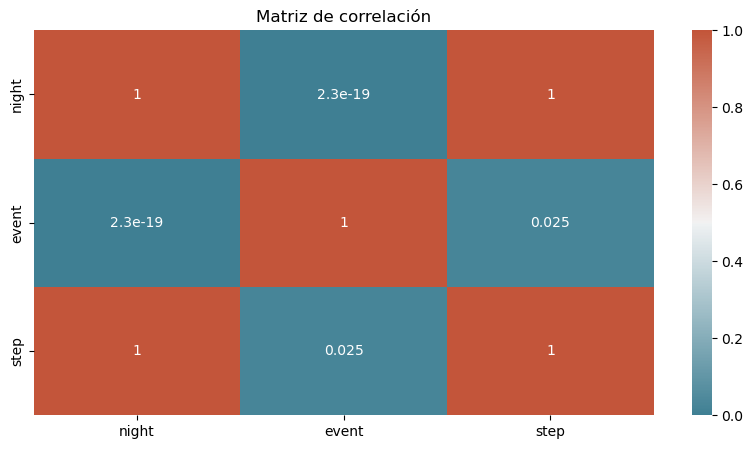

In [194]:
corr = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Matriz de correlación")
plt.show()

<AxesSubplot:>

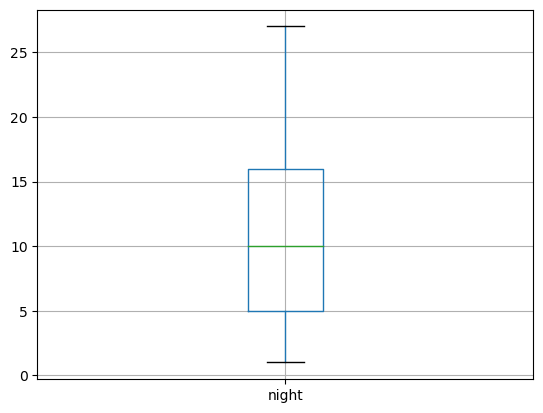

In [195]:
df_cleaned.boxplot('night')

<AxesSubplot:>

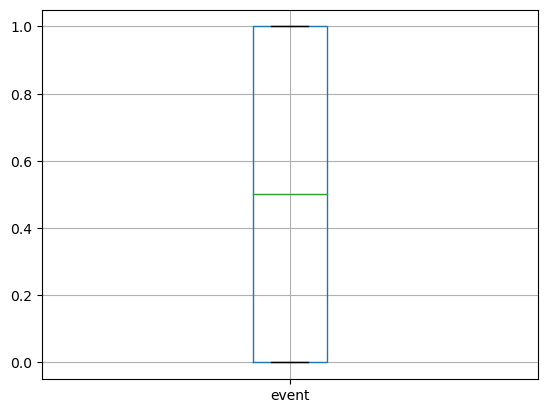

In [196]:
df_cleaned.boxplot('event')


<AxesSubplot:>

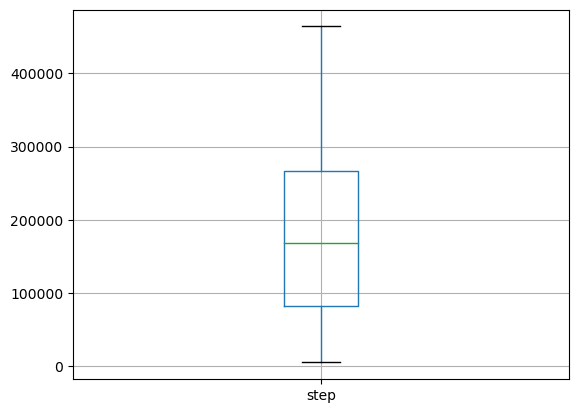

In [197]:
df_cleaned.boxplot('step')